## Question 1

In [1]:
using Distributions
using Gadfly
using Cairo

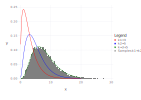

In [63]:
k1 = 3
k2 = 5
x = 0.1:0.1:20
n_samples = 10000

pdf1 = pdf.(Chisq(k1), x)
pdf2 = pdf.(Chisq(k2), x)
samples1 = rand(Chisq(k1), n_samples)
samples2 = rand(Chisq(k2), n_samples)
samples_sum = samples1 .+ samples2

pdf_sum = pdf.(Chisq(k1 + k2), x)

myplot = plot(
    layer(x=x, y=pdf1, Geom.line, Theme(default_color="red")),
    layer(x=x, y=pdf2, Geom.line, Theme(default_color="blue")),
    layer(x=x, y=pdf_sum, Geom.line, Theme(default_color="green")),
    layer(x=samples_sum, Geom.histogram(bincount=100, density=true), Theme(default_color="gray")),
    Guide.manual_color_key("Legend", ["k1=3", "k2=5", "k=3+5", "Samples k1+k2"], ["red", "blue", "green", "gray"]),
    Theme(background_color="white")
)
draw(PNG("chi_squared.png", 6inch, 4inch), myplot)
myplot

## Question 2

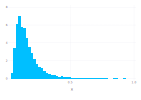

In [36]:
n_samples = 10000
k = 8
d = InverseGamma(k/2, 1/2) # beta^-1
samples = rand(d, n_samples)
myplot = plot(
    x=samples,
    Geom.histogram(bincount=100, density=true),
    Theme(background_color="white"),
    Coord.cartesian(xmax=1)
)